In [148]:
# Necessary import
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
%matplotlib inline

In [149]:
# find paths of the datases
person_path = os.path.abspath(os.path.join(os.getcwd(), "../..")) + '/sport_datasets/' + 'person.csv'
membership_path = os.path.abspath(os.path.join(os.getcwd(), "../..")) + '/sport_datasets/' + 'membership.csv'
stat_path = os.path.abspath(os.path.join(os.getcwd(), "../..")) + '/sport_datasets/' + 'stat.csv'

In [150]:
# load data from datasets
person = pd.read_csv(person_path)
membership = pd.read_csv(membership_path)
stat = pd.read_csv(stat_path)

In [151]:
person.head()

,id,firstName,lastName,matchName,type,position,lastUpdated,nationality,nationalityId,dateOfBirth,placeOfBirth,countryOfBirthId,countryOfBirth,height,weight,gender,status,foot
0,dkh5rfgsoiovvuackx9o5svrp,Dawid,Smug,D. Smug,player,Goalkeeper,2018-11-17T18:58:14Z,Poland,27baqb7359ywdvsxxklx1kn11,1994-01-14,Konin,27baqb7359ywdvsxxklx1kn11,Poland,194.0,85.0,Male,active,NaN
1,2m1fi26tv277k17l9v89uux1x,Sadiq,Quliyev,S. Quliyev,player,Defender,2018-12-09T12:31:37Z,Azerbaijan,52sufqqq7vid3xa6iljx6obcz,1995-03-09,NaN,52sufqqq7vid3xa6iljx6obcz,Azerbaijan,NaN,NaN,Male,active,NaN
2,5ojtb45gyd00i0chyku6btuxh,Jaime José,Moreno Ciorciari,J. Moreno,player,Attacker,2018-12-10T05:46:18Z,Nicaragua,4of7fctqcqbj3rai95vd4jk26,1995-03-30,Puerto La Cruz,1er0616j12s9yghuzvsx76d5v,Venezuela,183.0,82.0,Male,active,NaN
3,2w0vvlgz7ib4f2dvkinycj55h,Leandro,Leite Mateus,Leandro Leite,player,Midfielder,2018-11-24T20:01:10Z,Brazil,2vufyvpoxd9lfl9f6vpp7tz6y,1982-12-27,Piracanjuba,2vufyvpoxd9lfl9f6vpp7tz6y,Brazil,181.0,75.0,Male,active,right
4,eyas8ovmtmcmkilzd9lox4hxx,Sergey,Balanovich,S. Balanovich,player,Midfielder,2018-12-02T15:31:47Z,Belarus,2vn7xzv9g752y1h5ufjzr27i8,1987-08-29,Pinsk,2vn7xzv9g752y1h5ufjzr27i8,Belarus,176.0,70.0,Male,active,right


# Clean person.csv

In [152]:
person = person.loc[person['type'] == 'player']
print('The number of remaining rows is {}'.format(person.shape[0]))
person = person.drop_duplicates()
print('The duplicates are dropped, the shape afterward is {}.'.format(person.shape))

The number of remaining rows is 44201
The duplicates are dropped, the shape afterward is (44200, 18).


In [153]:
person['dateOfBirth'] = pd.to_datetime(person['dateOfBirth'])
person['lastUpdated'] = pd.to_datetime(person['lastUpdated'])
# person.head()

In [154]:
# add a column about the ages.
person['age'] = 2020 - person['dateOfBirth'].dt.year

# add a column about the year of late update.
person['lastUpdated_year'] = person['lastUpdated'].dt.year

# distplot of ages
# chart = sns.distplot(person['age'])
# chart.set_title('Ages Distribution')

# person.describe()

# Clean membership.csv

In [155]:
membership = membership.drop_duplicates()
membership = membership.loc[membership['role']=='player']
print('The shape afterward is {}.'.format(membership.shape))

The shape afterward is (250305, 10).


In [156]:
membership.loc[membership['active']=='yes', 'endDate'] = '2019-1-1'
membership = membership.dropna(subset = ['endDate']) # drop nan data
print('There are {} rows left'.format(membership.shape[0]))
# membership.head()

There are 247915 rows left


In [157]:
#membership.loc[membership['endDate']=='201-05-04']
membership.loc[membership['startDate']=='0201-05-04', 'startDate'] = '2010-05-04'
membership.loc[membership['startDate']=='0011-01-01', 'startDate'] = '2011-01-01'

membership.loc[membership['endDate']=='0010-12-30', 'endDate'] = '2010-12-30'
membership.loc[membership['endDate']=='0201-04-15', 'endDate'] = '2010-04-15'
membership.loc[membership['endDate']=='0204-08-01', 'endDate'] = '2004-08-01'

membership['startDate'] = pd.to_datetime(membership['startDate'])
membership['endDate'] = pd.to_datetime(membership['endDate'])
membership.head()

,id,contestantId,contestantType,contestantName,active,startDate,endDate,role,type1,transferType
0,100cbzhz9d4n7p6lzkejh9rl5,59viwky8c7g3bq3japwgwn4z4,club,FC Rapperswil-Jona,yes,2018-07-17,2019-01-01,player,men,NaN
1,100cbzhz9d4n7p6lzkejh9rl5,6kxut8wiq1w4hr89ipl3bx63h,national,Bosnia-Herzegovina Under 21,no,2015-01-01,2015-12-31,player,youth,NaN
2,100gtoc2x0ica9p01rv3srmxh,cfuo584og02t9erol4nqofzrz,club,Black Leopards FC,yes,2014-01-01,2019-01-01,player,men,Transfer
3,100jsd7342gty8k0d6tte4hqt,81lpho34qr3dad0xzalq0abja,club,FK Crvena Zvezda Beograd,no,2010-01-01,2013-06-30,player,men,Transfer
4,100jsd7342gty8k0d6tte4hqt,dr4emys1xpm2h54oid0q5y2nx,club,OFI FC,no,2016-08-03,2017-01-15,player,men,Transfer


# Clean stat.csv

In [158]:
stat = stat.drop_duplicates()
print('The shape afterward is {}.'.format(stat.shape))

The shape afterward is (750230, 19).


In [159]:
stat.loc[stat['penaltyGoals'] == 58, 'penaltyGoals'] = 0

In [160]:
stat.loc[stat['minutesPlayed'] < 0, 'minutesPlayed'] =  abs(stat['minutesPlayed'])

In [161]:
# membership.loc[(membership['contestantName']=='FC Barcelona')]
# 5cfw7nza8d1dfzatr3noh5amc
stat.head()

,id,competitionId,competitionName,tournamentCalendarId,tournamentCalendarName,goals,assists,penaltyGoals,appearances,yellowCards,secondYellowCards,redCards,substituteIn,substituteOut,subsOnBench,minutesPlayed,competitionFormat,isFriendly,shirtNumber
0,100cbzhz9d4n7p6lzkejh9rl5,8cit3whr514nnd4zkaovsnqn,Schweizer Pokal,921enf1hogc2zrrbqyx3klsa2,2018/2019,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,80.0,Domestic cup,no,NaN
1,100cbzhz9d4n7p6lzkejh9rl5,8v97rcbthsxmzqk4ufxws9mug,Challenge League,7g2ul8y2yz57i243mqvfasfai,2018/2019,0.0,0.0,0.0,13.0,3.0,0.0,0.0,9.0,3.0,12.0,463.0,Domestic league,no,19.0
2,100cbzhz9d4n7p6lzkejh9rl5,a3egqgf45jqft6y0uoyvw3mbj,UEFA U21 Championship,4ky5r5qpix3922f4duatljcvd,2017 Poland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,International cup,no,NaN
3,100gtoc2x0ica9p01rv3srmxh,bowzlakqovi6ldlo84e3ttad7,Cup,bb5s4bcz973nju165tbderdy6,2013/2014,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,120.0,Domestic cup,no,NaN
4,100gtoc2x0ica9p01rv3srmxh,8rpwq647aw0j9v1f2wns2kfkb,Play-offs 1/2,3fifwij2oh2jvghrpituizv2i,2013/2014,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,360.0,Domestic cup,no,NaN


# Select Data

In [162]:
#!/user/local/bin/python2.7
# -*- coding:utf-8 -*-
import os
def mkdir(path):
    # remove space
    path=path.replace(' ','')
    # remove \\
    path=path.rstrip("\\")
    # check if path exists
    isExists=os.path.exists(path)
    
    if not isExists:
        # if does not exist, create the folder
        '''
        os.mkdir(path)与os.makedirs(path)的区别是,当父目录不存在的时候os.mkdir(path)不会创建，os.makedirs(path)则会创建父目录
        '''
        #coding as utf-8
        os.makedirs(path) 
        print (path+'is successfully created')
        return True
    else:
        # if exists, create nothing
        print (path+' already exists')
        return False

## This is for test

In [163]:
# stat.loc[stat['id']=='14h2id0mltju588k4o0vefrv9']
# membership.loc[(membership['id']=='14h2id0mltju588k4o0vefrv9')&((membership['startDate'].dt.year <= 2018)&(membership['endDate'].dt.year > 2018))&(membership['contestantType']=='club')&(membership['type1']=='men')]
# person.loc[person['id']=='14h2id0mltju588k4o0vefrv9']
# stat.loc[(stat['competitionId']=='2kwbbcootiqqgmrzs6o5inle5')&(stat['tournamentCalendarName']=='2018/2019')]
# membership.loc[membership['id']=='6krs130vpjwfkyo4227f2fkr9']

# League Average Search

In [164]:
# search all the teams from a certain league in a certain season
def league_select(league, season):
    year = int(season[0:4])
    
    # search stat from selected league
    if year == 2018: # different filter
        stat_league = stat.loc[(stat['competitionId']=='2kwbbcootiqqgmrzs6o5inle5')&(stat['tournamentCalendarName']==season)&(stat['minutesPlayed']>=500)]
    else:   
        stat_league = stat.loc[(stat['competitionId']=='2kwbbcootiqqgmrzs6o5inle5')&(stat['tournamentCalendarName']==season)&(stat['minutesPlayed']>=1600)]
    # print(stat_league)
    
    # search membership from stat
    membership_league = membership.loc[(membership['id'].isin(stat_league['id']))&((membership['startDate'].dt.year <= year)&(membership['endDate'].dt.year > year))&(membership['contestantType']=='club')&(membership['type1']=='men')&(membership['transferType']=='Transfer')]
    # print(membership_league)
    # get team names in the selected league
    team_league = membership_league['contestantName'].values
    team_league = list(set(team_league)) # remove redundant elements
    # print(team_league)
    return team_league

In [165]:
# search and calculate league average div and coh
def league_search():
    league = 'Premier League' # generate a league
    season = '2018/2019' # generate a season
    seasons = seasons_10(season)

    league_average = {} # a dict for league average data

    # lists for league average data
    age_div_lg, club_div_lg, national_div_lg, current_co_lg, past_co_lg, national_co_lg = [],[],[],[],[],[]

    # search for teams in each season
    for s in seasons:
        # lists for each season
        age_d_lg, club_d_lg, national_d_lg, current_c_lg, past_c_lg, national_c_lg = [],[],[],[],[],[]

        team_s = league_select(league, s) # get all the 20 team names
        print('There are {} teams in Premier League in season {}.\n'.format(len(team_s),s))
        # print('There are {} teams in Premier League in season {}, which are {}.\n\n'.format(len(team_s),s,team_s))

        # calculate structure folds for each team
        for team in team_s:
            # print('processing team {}'.format(team))

            # get div and coh data
            age_d, club_d, national_d, current_c, past_c, national_c = data_select(team, s)

            # put data into relevant lists
            age_d_lg.append(age_d)
            club_d_lg.append(club_d)
            national_d_lg.append(national_d)
            current_c_lg.append(current_c)
            past_c_lg.append(past_c)
            national_c_lg.append(national_c)
        # print(age_d_lg)
        # put average data of each season into league average lists
        age_div_lg.append(np.mean(age_d_lg))
        club_div_lg.append(np.mean(club_d_lg))
        national_div_lg.append(np.mean(national_d_lg))
        current_co_lg.append(np.mean(current_c_lg))
        past_co_lg.append(np.mean(past_c_lg))
        national_co_lg.append(np.mean(national_c_lg))

    league_average = {'age_div':age_div_lg, 'club_div':club_div_lg, 'national_div':national_div_lg,
                      'current_co':current_co_lg, 'past_co':past_co_lg, 'national_co':national_co_lg}

    # print(age_div_lg)
    # print(club_div_lg)
    # print(national_div_lg)
    # print(current_co_lg)
    # print(past_co_lg)
    # print(national_co_lg)

    print(league_average)
    return league_average

# Membership & Career Search

In [166]:
# select team members and their membership and stat in one season
def team_select(team, season):
    year = int(season[0:4])
    
    # select membership of selected year
    membership_team = membership.loc[(membership['contestantName'] == team)&((membership['startDate'].dt.year <= year)&(membership['endDate'].dt.year > year))]
    
    # select players from relevant membership
    person_team = person.loc[person['id'].isin(membership_team['id'])]
    
    # adjust player ages for the selected season
    person_team['age'] = person_team['age'] - (2020 - int(season[5:9]))
    
    # select stats from relevant membership
    stat_team = stat.loc[(stat['id'].isin(membership_team['id'])) & ((stat['tournamentCalendarName'] == season)|(stat['tournamentCalendarName'] == season[5:9]))&(stat['isFriendly'] == 'no')]
    
    # set minutes played for team members
    person_team['minutesPlayed'] = person_team.id.apply(lambda x: np.sum(stat_team.loc[stat_team['id'] == x]['minutesPlayed']))
    
    # select 16 players according to the minutes they played
    time_sort = np.sort(person_team['minutesPlayed'])
    time_sort = time_sort[::-1] # make the time sorted
    
    # make the team at most 16 players
    if time_sort.shape[0] >= 16:
        team_size = 16
    else:
        team_size = time_sort.shape[0]

    person_team = person_team.loc[person_team['minutesPlayed'] >= time_sort[team_size-1]] # update team members
    
    # sort players by nationality
    group_nation = person_team.groupby('nationality')
    p = pd.DataFrame()
    for group_name, group_df in group_nation:
        p = pd.concat([p,group_df])
    person_team = p
    
    # update membership and stat according to the selected 16 players
    membership_team = membership.loc[membership['id'].isin(person_team['id'])]
    stat_team = stat_team.loc[stat_team['id'].isin(person_team['id'])]
    
    # distinguish club and national memberships
    membership_club = membership_team.loc[membership_team['contestantType'] == 'club']
    membership_national = membership_team.loc[membership_team['contestantType'] == 'national']
    
    return membership_club, membership_national, person_team, stat_team

In [167]:
# select careers of team members in past 10 seasons
def career_search(person, membership, season):
    # define 10 seasons
    seasons = seasons_10(season)
    # print('The seasons are from {} to {}'.format(seasons[0], seasons[9]))
    
    # filter membership
    start = int(seasons[0][0:4])
    end = int(seasons[9][5:9])
    membership = membership.loc[((membership['startDate'].dt.year >= start)&(membership['startDate'].dt.year <= end))|((membership['endDate'].dt.year >= start)&(membership['endDate'].dt.year <= end))]
    # print(membership['contestantName'].unique())
    
    # search memberships by season
    col = np.append(['matchName'],seasons) # define the columns
    career_paths = pd.DataFrame(columns = col) 
    team_names = []
    for i in person['id'].values:
        career = {'matchName': person.loc[person['id'] == i]['matchName'].values[0]}
        for s in seasons:
            year = int(s[0:4])
            # search for membership of the season
            m = membership.loc[(membership['id'] == i) & ((membership['startDate'].dt.year <= year) & (membership['endDate'].dt.year > year))]
            # print(m)
            m_name = m['contestantName'].values  # get team name
            
            # print(m_name)
            if m_name.shape[0]>1:
                m_name = m_name[0:1]
                
            if m_name.shape[0]>=1:
                # transfer Youth into Men
                if 'Under' in str(m_name[0]):
                    m_name[0] = str(m_name[0]).split(' Under ')[0]
                if 'II' in str(m_name[0]):
                    m_name[0] = str(m_name[0]).split(' II')[0]
                team_names.append(m_name[0])  # append team name into list
                
            if len(m_name) == 0:
                career[s] = '/'
            else:
                career[s] = str(m_name[0])
        career_paths = career_paths.append(career,ignore_index=True)
        # print(career)
        
    # transfer team_names into Series    
    team_names = pd.Series(pd.Series(team_names).unique())
    # print(team_names)
    return seasons, career_paths, team_names

In [168]:
# str = 'Liverpool FC Under 21'
# if 'Under' in str:
#     print(str.split(' Under ')[0])
# 
# str = 'Liverpool FC II'
# print(str.split(' II')[0])

# Cohesion & Diversity Search

In [169]:
# search for diversity
def diversity (person, club_names, national_names):
    age_div = person['age'].unique().shape[0]
    club_div = club_names.shape[0]
    national_div = person['nationality'].unique().shape[0]
    return age_div, club_div, national_div

In [170]:
# search for cohesion
def cohesion(team, seasons, paths_club, paths_national):
    seasons_re = seasons[::-1] # 2018 to 2008
    
    # current cohesion: total years of 8 senators playing for the current team
    current_co = 0
    senators = []

    for index,row in paths_club.iterrows():
        current = 0
        for s in seasons_re:
            if row[s] == team:
                current+=1
            else:
                break
        senators = np.append(senators,current)
    senators = np.sort(senators)[::-1][0:8]  # eight oldest players as senator group
    # print(senators)
    current_co = senators[-1]
    
    # past cohesion of clubs
    past_co = 0
    # for every season, check if there's overlap besides selected team
    for s in seasons:
        club_unique = paths_club[s].value_counts()
        for i, v in club_unique.iteritems():
            if v>1:
                if (i != '/') & (i != team):
                    past_co = past_co+1
            else:
                break
    # print(past_co)
    
    # cohesion of national teams
    national_co = 0
    # for every season, check if there's national team overlap
    for s in seasons:
        national_unique = paths_national[s].value_counts()
        for i, v in national_unique.iteritems():
            if v>1:
                if i != '/':
                    national_co = national_co+1
            else:
                break
    
    return current_co, past_co, national_co

In [171]:
# define 10 seasons
def seasons_10(season):
    seasons = [season]
    for i in range(1,10):
        year = int(season[5:9])-i
        s = str(year-1) + '/' + str(year)
        seasons.append(s)
    seasons = seasons[::-1]
    return seasons

# Data Sorting

In [172]:
# search diversity and cohesion
def data_select(team, season):
    # print('Selecting data about {} in season {} ...'.format(team, season))
    
    # select memberships and players
    membership_club, membership_national, person, stat_team = team_select(team, season)
    
    # select career paths for both club and national team
    seasons, paths_club, club_names = career_search(person, membership_club, season)
    seasons, paths_national, national_names = career_search(person, membership_national, season)
    # print(paths_national)
    # calculate team diversity
    age_div, club_div, national_div = diversity(person, club_names, national_names)
    # print(age_div, club_div, national_div)
    
    #calculate team cohesion
    current_co, past_co, national_co = cohesion(team, seasons, paths_club, paths_national)
    # print(current_co, past_co, national_co)
    
    return age_div, club_div, national_div, current_co, past_co, national_co

# Normalization

In [226]:
def normalization(data):
    d = data/np.sum(data)
    for i in range(0,len(d)):
        d[i] = round(d[i], 4)
    return d

In [174]:
def z_score(data):
    dt = data.copy()
    lenth = len(dt)
    total = sum(dt)
    ave = float(total)/lenth
    tempsum = sum([pow(dt[i] - ave,2) for i in range(lenth)])
    tempsum = pow(float(tempsum)/lenth,0.5)
    for i in range(lenth):
        dt[i] = (dt[i] - ave)/tempsum
    return np.round(np.array(dt),3)

In [175]:
# sort data for the 4 outliers
seasons = seasons_10('2018/2019')
teams = ['Arsenal FC', 'Tottenham Hotspur FC', 'Chelsea FC', 'Newcastle United FC']

# input ranks
arsenal = [3, 4, 3, 4, 4, 3, 2, 4, 6, 5]
tottenham = [4, 5, 4, 5, 6, 5, 3, 2, 3, 4]
chelsea = [1, 2, 6, 3, 3, 1, 10, 1, 5, 3]
newcastle = [21, 12, 5, 16, 10, 15, 18, 21, 10, 13]
def outliers_search():
    # arsenal_norm = normalization(arsenal)
    # tottenham_norm = normalization(tottenham)
    # chelsea_norm =normalization(chelsea)
    # newcastle_norm = normalization(newcastle)

    # arsenal_norm = z_score(arsenal)
    # tottenham_norm = z_score(tottenham)
    # chelsea_norm =z_score(chelsea)
    # newcastle_norm = z_score(newcastle)
    # 
    # print('Normalized Arsenal Rank: {}'.format(arsenal_norm))
    # print('Normalized Tottenham Rank: {}'.format(tottenham_norm))
    # print('Normalized Chelsea Rank: {}'.format(chelsea_norm))
    # print('Normalized Newcastle Rank: {}'.format(newcastle_norm))

    # put data into dictionaries
    i = 0
    rank_arsenal= {}
    rank_tottenham = {}
    rank_chelsea = {}
    rank_newcastle = {}
    for season in seasons:
        rank_arsenal[season] = arsenal[i]
        rank_tottenham[season] = tottenham[i]
        rank_chelsea[season] = chelsea[i]
        rank_newcastle[season] = newcastle[i]
        i+=1

    rank_outliers = {'Arsenal FC':arsenal, 'Tottenham Hotspur FC':tottenham, 'Chelsea FC':chelsea, 'Newcastle United FC':newcastle}
    data_outliers = {}
    # sort target data into dictionaries
    for team in teams:
        print('Proccessing {}...\n\n'.format(team))
        data = {'age_div':[],'club_div':[],'national_div':[],
            'current_co':[],'past_co':[],'national_co':[]}
        # data_norm = {}
        for season in seasons:
            age_div, club_div, national_div, current_co, past_co, national_co = data_select(team,season)
            data['age_div'].append(age_div)
            data['club_div'].append(club_div)
            data['national_div'].append(national_div)
            data['current_co'].append(current_co)
            data['past_co'].append(past_co)
            data['national_co'].append(national_co)
        # for key in data:
            # v = data[key]
            # data_norm[key] = normalization(v)
            # data_norm[key] = z_score(v)
        data_outliers[team] = data

        # print(data)
        # print('\n\n')
        # print(data_norm)
        # print('\n\n\n')
    
    average_outliers = {'regular':{},'irregular':{}} # a dict for average data of the outliers.
    
    # calculate average data for regular teams
    for key in data_outliers['Arsenal FC']:
        a = []
        i = 0
        for d in data_outliers['Arsenal FC'][key]:
            a.append(np.mean([d,data_outliers['Tottenham Hotspur FC'][key][i]])) # search in another regular team to get average value
            i+=1
        average_outliers['regular'][key] = a
    
    # calculate average data for irregular teams
    for key in data_outliers['Chelsea FC']:
        a = []
        i = 0
        for d in data_outliers['Chelsea FC'][key]:
            a.append(np.mean([d,data_outliers['Newcastle United FC'][key][i]])) # search in another regular team to get average value
            i+=1
        average_outliers['irregular'][key] = a
        
    
    print(rank_outliers,'\n\n')
    print(data_outliers,'\n\n')
    print(average_outliers)
    return seasons, rank_outliers, data_outliers, average_outliers

In [176]:
# outliers
seasons, rank_outliers, data_outliers, average_outliers = outliers_search()

Proccessing Arsenal FC...




/Users/zzy/opt/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/zzy/opt/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Proccessing Tottenham Hotspur FC...


Proccessing Chelsea FC...


Proccessing Newcastle United FC...


{'Arsenal FC': [3, 4, 3, 4, 4, 3, 2, 4, 6, 5], 'Tottenham Hotspur FC': [4, 5, 4, 5, 6, 5, 3, 2, 3, 4], 'Chelsea FC': [1, 2, 6, 3, 3, 1, 10, 1, 5, 3], 'Newcastle United FC': [21, 12, 5, 16, 10, 15, 18, 21, 10, 13]} 


{'Arsenal FC': {'age_div': [9, 8, 9, 9, 9, 10, 12, 10, 11, 10], 'club_div': [15, 17, 25, 26, 25, 32, 30, 21, 24, 26], 'national_div': [11, 10, 13, 10, 7, 9, 10, 8, 11, 12], 'current_co': [3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0], 'past_co': [0, 0, 0, 1, 2, 2, 2, 0, 0, 6], 'national_co': [3, 7, 4, 6, 23, 16, 17, 13, 25, 6]}, 'Tottenham Hotspur FC': {'age_div': [11, 9, 9, 10, 10, 10, 8, 10, 9, 10], 'club_div': [23, 22, 23, 29, 35, 25, 29, 19, 21, 19], 'national_div': [7, 8, 8, 9, 10, 9, 8, 7, 8, 8], 'current_co': [2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0], 'past_co': [3, 4, 3, 0, 3, 3, 5, 6, 6, 4], 'national_co': [9, 13, 13, 14, 16, 18, 15, 15, 16, 26]}, 'C

In [177]:
# league average
average_league = league_search()

There are 20 teams in Premier League in season 2009/2010.



/Users/zzy/opt/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/zzy/opt/anaconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


There are 20 teams in Premier League in season 2010/2011.

There are 20 teams in Premier League in season 2011/2012.

There are 20 teams in Premier League in season 2012/2013.

There are 20 teams in Premier League in season 2013/2014.

There are 20 teams in Premier League in season 2014/2015.

There are 20 teams in Premier League in season 2015/2016.

There are 20 teams in Premier League in season 2016/2017.

There are 20 teams in Premier League in season 2017/2018.

There are 20 teams in Premier League in season 2018/2019.

{'age_div': [8.05, 9.15, 9.15, 9.25, 9.05, 9.15, 9.5, 10.1, 9.65, 9.55], 'club_div': [14.6, 19.45, 22.85, 26.15, 27.55, 29.05, 31.1, 28.4, 31.0, 29.8], 'national_div': [7.35, 8.7, 9.15, 9.0, 9.0, 9.45, 9.3, 8.7, 9.05, 9.5], 'current_co': [1.55, 2.0, 2.05, 2.2, 2.2, 2.3, 2.35, 2.7, 2.45, 2.6], 'past_co': [0.65, 1.4, 1.3, 2.85, 3.1, 3.05, 4.25, 3.3, 3.05, 3.5], 'national_co': [2.75, 4.85, 5.75, 7.9, 10.85, 12.35, 11.45, 10.55, 10.95, 10.95]}


Text(-26,20,'Data')

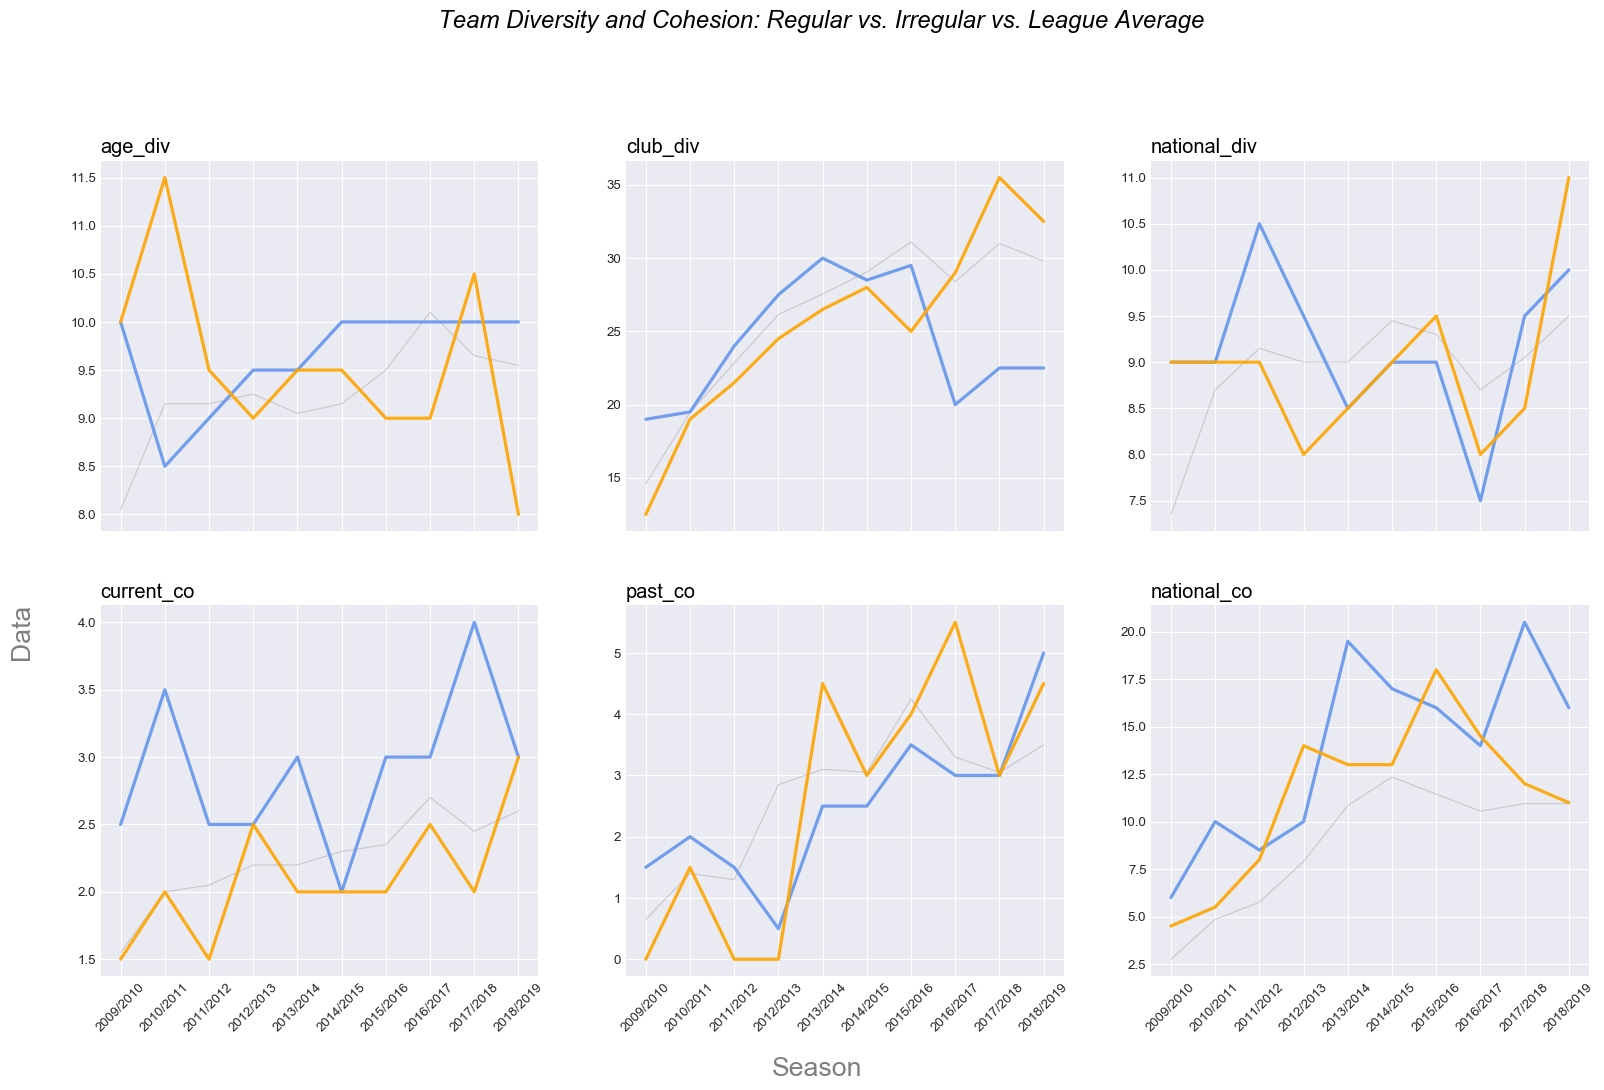

In [178]:
# plot the 6 attributes for two groups of outliers and league average.
# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi) 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for key in average_league:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # Plot the league average
    plt.plot(seasons, average_league[key], marker='', color='darkgrey', linewidth=0.9, alpha=0.5)
    # Plot the outliers
    plt.plot(seasons, average_outliers['regular'][key], marker='', color='cornflowerblue', linewidth=2.4, alpha=0.9)
    plt.plot(seasons, average_outliers['irregular'][key], marker='', color='orange', linewidth=2.4, alpha=0.9)
    # Same limits for everybody!
    # plt.xlim(0,10)
    # plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(1,4) :
        plt.tick_params(labelbottom='off')
 
    # Add title
    plt.title(key, loc='left', fontsize=15, fontweight=0, color='black' )
    
    plt.xticks(rotation = 45)
# general title
plt.suptitle("Team Diversity and Cohesion: Regular vs. Irregular vs. League Average", fontsize=18, fontweight=0, color='black', style='italic', y=1.02)
# Axis title
plt.text(-8, -3, 'Season', ha='center', va='center', color = 'grey', fontsize=20)
plt.text(-26, 20, 'Data', ha='center', va='center', rotation='vertical', color = 'grey',fontsize=20)

In [238]:
# # plot club_div against past_co for the whole league in 10 seasons

# # Initialize the figure
# plt.style.use('seaborn-darkgrid')
# my_dpi = 96
# plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# # create a color palette
# palette = plt.get_cmap('Set1')
# # Plot the club_div and past_co
# plt.plot(seasons, average_league['club_div'], color='tomato', linewidth=2.4, alpha=0.9, label='club_div')
# plt.plot(seasons, average_league['past_co'], color='seagreen', linewidth=2.4, alpha=0.9, label='past_co')
# plt.legend()
# # Add title
# plt.title('club_div against past_co for the whole league in 10 seasons', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

# plt.xticks(rotation = 45) # rotate the xticks.

# # calculate the weight for the two attributes
# a = round(np.mean(average_league['club_div']),3)
# b = np.mean(average_league['past_co'])

# print('The average club_div for the whole league in 10 seasons is: {}, while the past_co is: {}'.format(a,b))
# print('So their ratio is {} : 1.'.format(round(a/b,3)))

In [237]:
# # plot structural fold for two groups of outliers, with weights
# # calculate the weights
# w_club_div = 9.828/10.828
# w_past_co = 1/10.828

# # calculate structural fold with weights
# struct_f = {}
# avg_st = {}
# # structural fold
# for team in teams:
#     struct_f[team] = np.array(data_outliers[team]['club_div'])*w_club_div - np.array(data_outliers[team]['past_co'])*w_past_co
# print(struct_f)

# # calculate average data for regular teams
# i = 0
# a = []
# for sf in struct_f['Arsenal FC']:
#     a.append(np.mean([sf,struct_f['Tottenham Hotspur FC'][i]])) # search in another regular team to get average value
#     i+=1
# avg_st['regular'] = a

# # calculate average data for irregular teams
# i = 0
# a = []
# for sf in struct_f['Chelsea FC']:
#     a.append(np.mean([sf,struct_f['Newcastle United FC'][i]])) # search in another regular team to get average value
#     i+=1
# avg_st['irregular'] = a
# print('\n')
# print(avg_st)

# # plot structural folds

# # Initialize the figure
# plt.style.use('seaborn-darkgrid')
# my_dpi = 96
# plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# # create a color palette
# palette = plt.get_cmap('Set1')
# # Plot the club_div and past_co
# plt.plot(seasons, avg_st['regular'], marker='', color='cornflowerblue', linewidth=2.4, alpha=0.9,label='regular')
# plt.plot(seasons, avg_st['irregular'], marker='', color='orange', linewidth=2.4, alpha=0.9,label='irregular')
# plt.legend()
# # Add title
# plt.title('structural fold for the two groups of outliers (with weights)', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

# plt.xticks(rotation = 45) # rotate the xticks.

In [236]:
# # plot structural fold for two groups of outliers

# # calculate structural fold
# struct_f = {}
# avg_st = {}
# # structural fold
# for team in teams:
#     struct_f[team] = np.array(data_outliers[team]['club_div']) - np.array(data_outliers[team]['past_co'])
# print(struct_f)

# # calculate average data for regular teams
# i = 0
# a = []
# for sf in struct_f['Arsenal FC']:
#     a.append(np.mean([sf,struct_f['Tottenham Hotspur FC'][i]])) # search in another regular team to get average value
#     i+=1
# avg_st['regular'] = a

# # calculate average data for irregular teams
# i = 0
# a = []
# for sf in struct_f['Chelsea FC']:
#     a.append(np.mean([sf,struct_f['Newcastle United FC'][i]])) # search in another regular team to get average value
#     i+=1
# avg_st['irregular'] = a
# print('\n')
# print(avg_st)

# # plot structural folds

# # Initialize the figure
# plt.style.use('seaborn-darkgrid')
# my_dpi = 96
# plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# # create a color palette
# palette = plt.get_cmap('Set1')
# # Plot the club_div and past_co
# plt.plot(seasons, avg_st['regular'], marker='', color='cornflowerblue', linewidth=2.4, alpha=0.9,label='regular')
# plt.plot(seasons, avg_st['irregular'], marker='', color='orange', linewidth=2.4, alpha=0.9,label='irregular')
# plt.legend()
# # Add title
# plt.title('structural fold (club_div - past_co) for the two groups of outliers', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

# plt.xticks(rotation = 45) # rotate the xticks.

In [182]:
# Calculate fluctuation of each variable, provide it in a table.
fluct_outliers = {} # fluctuation data

# calculation
for team in teams:
    print('Calculating fluctuations for {}...\n'.format(team))
    fluct_outliers[team] = {}
    for key in data_outliers[team]:
        fluct = []
        fluct.append(data_outliers[team][key][0])
        for i in range(0,9):
            fluct.append(data_outliers[team][key][i+1]-data_outliers[team][key][i])
            i+=1
        fluct_outliers[team][key] = fluct

print(fluct_outliers,'\n')

# write the fluctuations into tables
for key in fluct_outliers: # transmit into dataframes
    df = pd.DataFrame(fluct_outliers[key])
    print(key,'\n',df,'\n')

Calculating fluctuations for Arsenal FC...

Calculating fluctuations for Tottenham Hotspur FC...

Calculating fluctuations for Chelsea FC...

Calculating fluctuations for Newcastle United FC...

{'Arsenal FC': {'age_div': [9, -1, 1, 0, 0, 1, 2, -2, 1, -1], 'club_div': [15, 2, 8, 1, -1, 7, -2, -9, 3, 2], 'national_div': [11, -1, 3, -3, -3, 2, 1, -2, 3, 1], 'current_co': [3.0, 1.0, -1.0, 0.0, 1.0, -2.0, 1.0, 0.0, 1.0, -2.0], 'past_co': [0, 0, 0, 1, 1, 0, 0, -2, 0, 6], 'national_co': [3, 4, -3, 2, 17, -7, 1, -4, 12, -19]}, 'Tottenham Hotspur FC': {'age_div': [11, -2, 0, 1, 0, 0, -2, 2, -1, 1], 'club_div': [23, -1, 1, 6, 6, -10, 4, -10, 2, -2], 'national_div': [7, 1, 0, 1, 1, -1, -1, -1, 1, 0], 'current_co': [2.0, 1.0, -1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], 'past_co': [3, 1, -1, -3, 3, 0, 2, 1, 0, -2], 'national_co': [9, 4, 0, 1, 2, 2, -3, 0, 1, 10]}, 'Chelsea FC': {'age_div': [10, 2, -3, 1, -1, 1, -1, 0, 3, -2], 'club_div': [11, 4, 3, 7, 8, -2, -2, 3, -4, 2], 'national_div': [11, 0, -2

Text(-13,75,'Data')

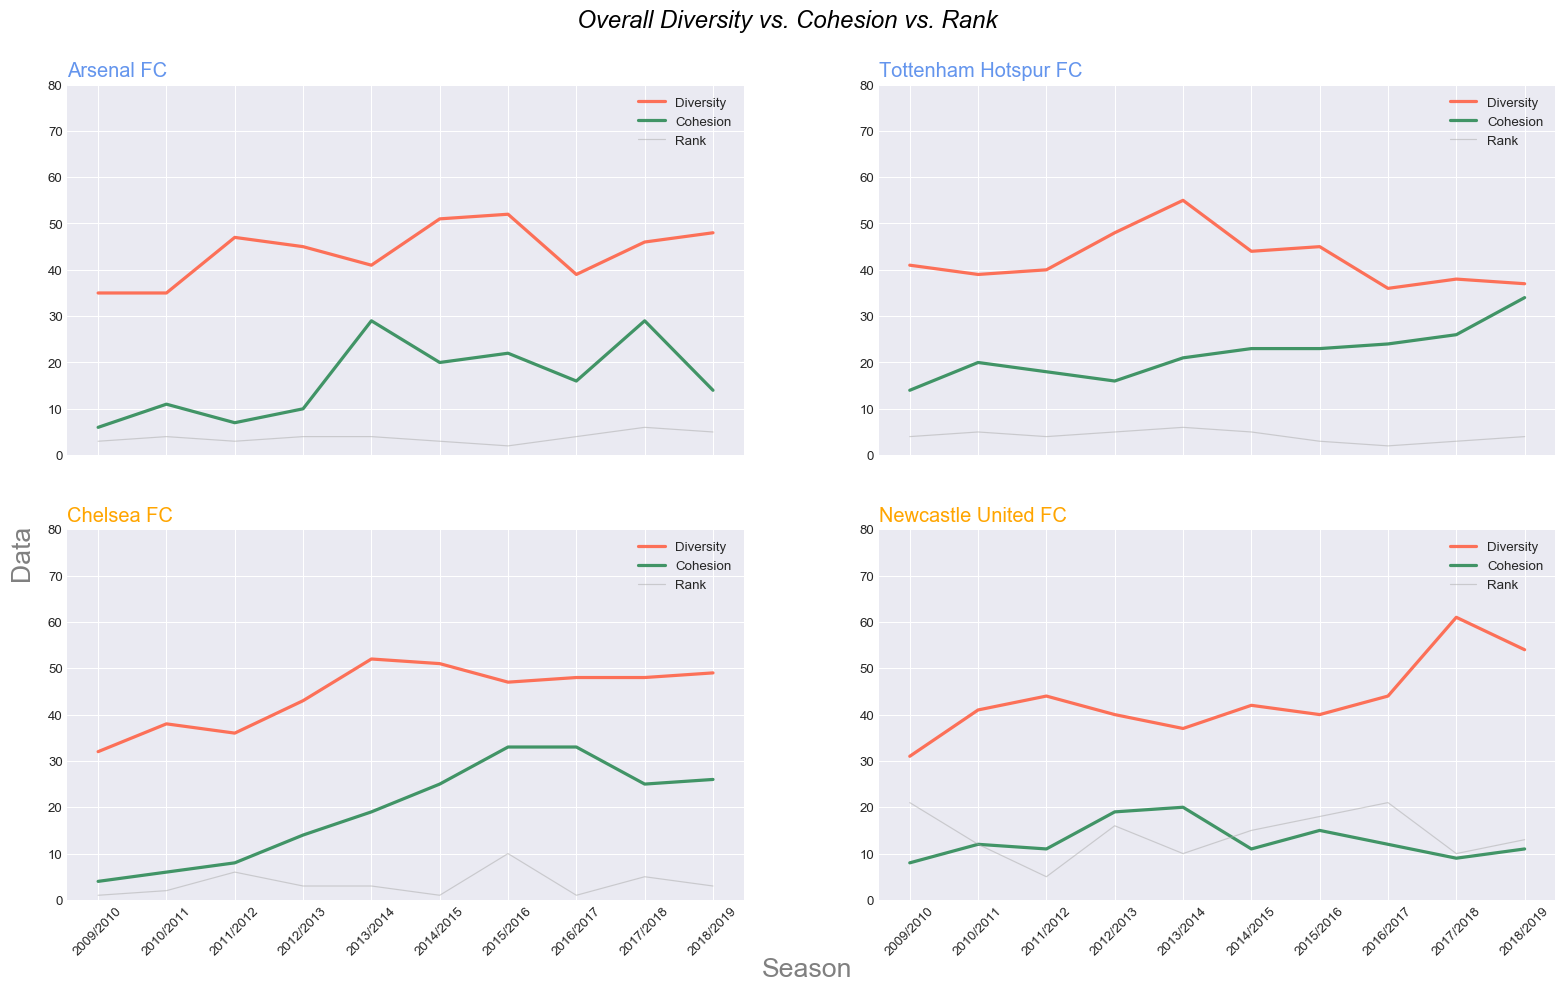

In [183]:
# Compare rank with overall diversity (age_div + club_div + nat_div) and cohesion series for each team.
# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi) 

num=0
for team in teams:
    num+=1
    
    # Find the right spot on the plot
    plt.subplot(2,2,num)
    
    # Plot the overall diversity and cohesion
    plt.plot(seasons, [a+b+c for a,b,c in zip(data_outliers[team]['age_div'],data_outliers[team]['club_div'],data_outliers[team]['national_div']) ], color='tomato', linewidth=2.4, alpha=0.9,label ='Diversity')
    plt.plot(seasons, [a+b+c for a,b,c in zip(data_outliers[team]['current_co'],data_outliers[team]['past_co'],data_outliers[team]['national_co']) ], color='seagreen', linewidth=2.4, alpha=0.9,label ='Cohesion')
    # Plot the ranks
    plt.plot(seasons,rank_outliers[team],marker='',color='darkgrey',linewidth=0.9,alpha=0.5,label = 'Rank')
    plt.legend()
    # Same limits for everybody!
    # plt.xlim(0,10)
    plt.ylim(0,80)
 
    # Not ticks everywhere
    if num in range(1,3) :
        plt.tick_params(labelbottom='off')
 
    # Add title
    if (team == 'Arsenal FC') or (team == 'Tottenham Hotspur FC'):
        plt.title(team, loc='left', fontsize=15, fontweight=0, color='cornflowerblue' )
    else:
        plt.title(team, loc='left', fontsize=15, fontweight=0, color='orange' )
    
    plt.xticks(rotation = 45)

# general title
plt.suptitle("Overall Diversity vs. Cohesion vs. Rank", fontsize=18, fontweight=0, color='black', style='italic', y=0.95)
# Axis title
plt.text(-1.5, -15, 'Season', ha='center', va='center', color = 'grey', fontsize=20)
plt.text(-13, 75, 'Data', ha='center', va='center', rotation='vertical', color = 'grey',fontsize=20)

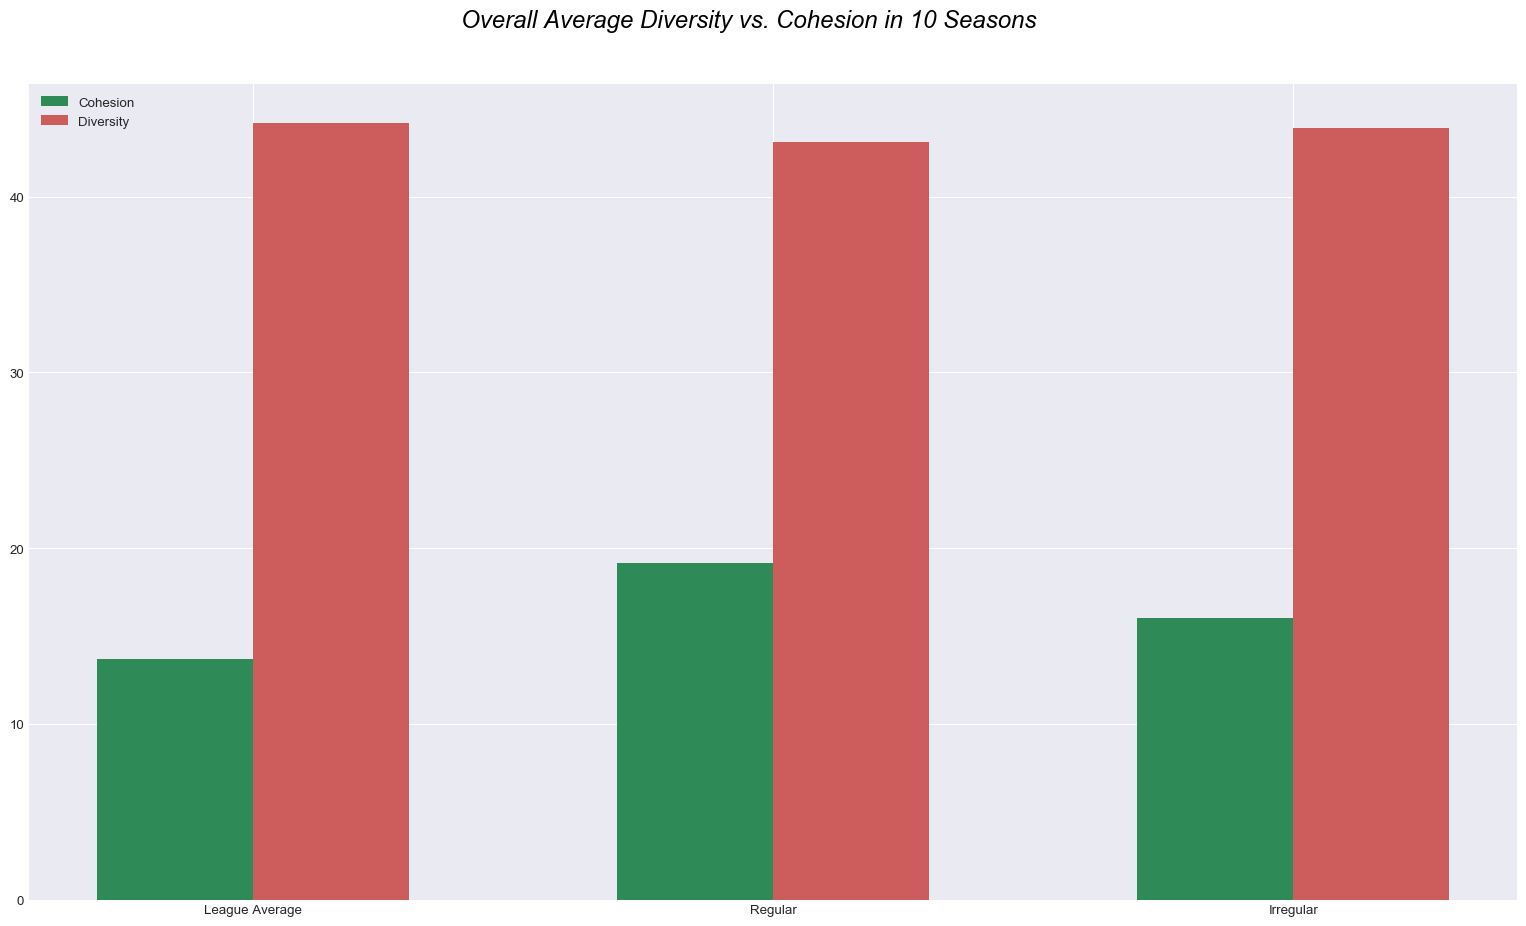

In [265]:
# An overall cumulative value for the 10 years.
ovrdiv_league = np.sum(average_league['age_div'])+np.sum(average_league['club_div'])+np.sum(average_league['national_div'])
ovrco_league = np.sum(average_league['current_co'])+np.sum(average_league['past_co'])+np.sum(average_league['national_co'])

ovrdiv_regular = np.sum(average_outliers['regular']['age_div'])+np.sum(average_outliers['regular']['club_div'])+np.sum(average_outliers['regular']['national_div'])
ovrco_regular = np.sum(average_outliers['regular']['current_co'])+np.sum(average_outliers['regular']['past_co'])+np.sum(average_outliers['regular']['national_co'])

ovrdiv_irregular = np.sum(average_outliers['irregular']['age_div'])+np.sum(average_outliers['irregular']['club_div'])+np.sum(average_outliers['irregular']['national_div'])
ovrco_irregular = np.sum(average_outliers['irregular']['current_co'])+np.sum(average_outliers['irregular']['past_co'])+np.sum(average_outliers['irregular']['national_co'])

entities = ['League Average','Regular', 'Irregular']
ovrdiv = [ovrdiv_league, ovrdiv_regular, ovrdiv_irregular]
ovrco = [ovrco_league, ovrco_regular, ovrco_irregular]

avrdiv = [ovrdiv_league/10, ovrdiv_regular/10, ovrdiv_irregular/10]
avrco = [ovrco_league/10, ovrco_regular/10, ovrco_irregular/10]
# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)

x=np.arange(3)
bar_width=0.3

plt.bar(x,avrco,bar_width,color='seagreen',label='Cohesion')
plt.bar(x+bar_width,avrdiv,bar_width,color='indianred', label='Diversity')
plt.suptitle("Overall Average Diversity vs. Cohesion in 10 Seasons", fontsize=18, fontweight=0, color='black', style='italic', y=0.95)
plt.legend()
plt.xticks(x+bar_width/2,entities)
plt.show()

In [188]:
# Structural Fold.
average_league
data_outliers

{'Arsenal FC': {'age_div': [9, 8, 9, 9, 9, 10, 12, 10, 11, 10],
  'club_div': [15, 17, 25, 26, 25, 32, 30, 21, 24, 26],
  'national_div': [11, 10, 13, 10, 7, 9, 10, 8, 11, 12],
  'current_co': [3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0],
  'past_co': [0, 0, 0, 1, 2, 2, 2, 0, 0, 6],
  'national_co': [3, 7, 4, 6, 23, 16, 17, 13, 25, 6]},
 'Tottenham Hotspur FC': {'age_div': [11, 9, 9, 10, 10, 10, 8, 10, 9, 10],
  'club_div': [23, 22, 23, 29, 35, 25, 29, 19, 21, 19],
  'national_div': [7, 8, 8, 9, 10, 9, 8, 7, 8, 8],
  'current_co': [2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0],
  'past_co': [3, 4, 3, 0, 3, 3, 5, 6, 6, 4],
  'national_co': [9, 13, 13, 14, 16, 18, 15, 15, 16, 26]},
 'Chelsea FC': {'age_div': [10, 12, 9, 10, 9, 10, 9, 9, 12, 10],
  'club_div': [11, 15, 18, 25, 33, 31, 29, 32, 28, 30],
  'national_div': [11, 11, 9, 8, 10, 10, 9, 7, 8, 9],
  'current_co': [1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0],
  'past_co': [0, 0, 0, 0, 0, 4, 6, 8, 5, 4],
  'national_c

In [248]:
# calculate weights via Coefficient of Variation
def weight_v(buffer):
    weight = {}
    data = {}
    variance =[]
    for key in buffer:
        m = np.mean(buffer[key]) # mean
        s = np.std(buffer[key]) # std
#         print(key)
#         print(m,s)
        data[key]=(s/m)
        variance.append(data[key])
    # print(variance)
    variance = normalization(variance)
    # print(variance)
    i = 0
    for key in buffer:
        weight[key] = variance[i]
        i+=1
    # print(weight)
    return weight    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

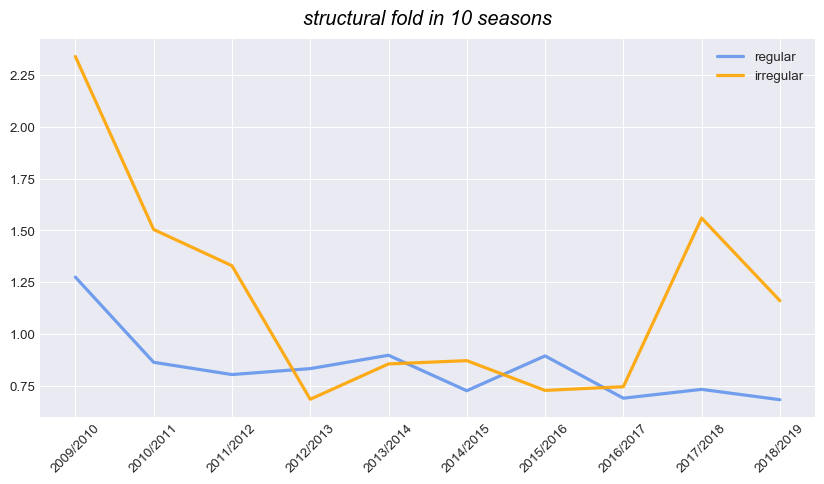

In [260]:
# Work out Structural Fold.
import math

weights = {'age_div':[],'club_div':[],'national_div':[],
            'current_co':[],'past_co':[],'national_co':[]}
for s in range(0,10):    # seasons
    buffer = {'age_div':[],'club_div':[],'national_div':[],
            'current_co':[],'past_co':[],'national_co':[]}
    for team in data_outliers:
        for attrib in average_league:
            buffer[attrib].append(data_outliers[team][attrib][s])
    w = weight_v(buffer)
    for attrib in buffer:
        weights[attrib].append(w[attrib])
# print(weights)

# weight attributes
avg_w_outliers = {'regular':{},'irregular':{}}

for g in average_outliers:
    for attrib in average_outliers[g]:
        buffer = []
        for s in range(0,10):
            buffer.append(average_outliers[g][attrib][s]*weights[attrib][s])
        avg_w_outliers[g][attrib] = buffer
# print(avg_w_outliers)

# structural fold
struct_f = {'regular':[],'irregular':[]}
for s in range(0,10):
    for g in struct_f:
        div = avg_w_outliers[g]['age_div'][s]+avg_w_outliers[g]['club_div'][s]+avg_w_outliers[g]['national_div'][s]
        co = avg_w_outliers[g]['current_co'][s]+avg_w_outliers[g]['past_co'][s]+avg_w_outliers[g]['national_co'][s]
        st = round(div/co,4)
        struct_f[g].append(st)
#print(struct_f)

# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# create a color palette
palette = plt.get_cmap('Set1')
# Plot the club_div and past_co
plt.plot(seasons, struct_f['regular'], color='cornflowerblue', linewidth=2.4, alpha=0.9, label='regular')
plt.plot(seasons, struct_f['irregular'], color='orange', linewidth=2.4, alpha=0.9, label='irregular')
plt.legend()
# Add title
plt.title('Structural Fold in 10 seasons', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

plt.xticks(rotation = 45) # rotate the xticks.

{'Arsenal FC': [2.9442, 1.4366, 2.3151, 0.8631, 0.6839, 0.8572, 1.0206, 1.0618, 0.839, 1.7235], 'Tottenham Hotspur FC': [0.8669, 0.6352, 0.4423, 0.8056, 1.1576, 0.6131, 0.7814, 0.4979, 0.6366, 0.382], 'Chelsea FC': [3.5219, 2.8095, 1.4251, 0.8345, 1.5807, 0.6677, 0.5664, 0.539, 0.866, 0.6888], 'Newcastle United FC': [1.7487, 1.0526, 1.2598, 0.5734, 0.5012, 1.3921, 1.0998, 1.3312, 3.703, 3.0418]}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

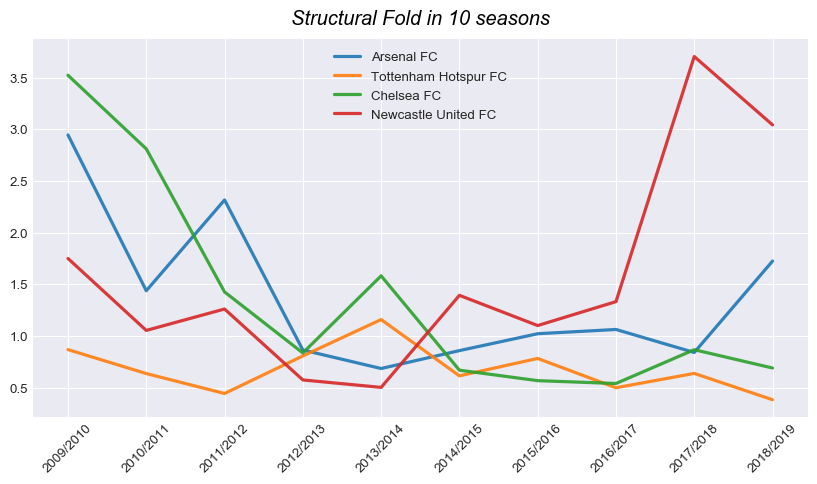

In [273]:
# structural fold for each team
w_outliers = {'Arsenal FC':{}, 'Tottenham Hotspur FC':{}, 'Chelsea FC':{}, 'Newcastle United FC':{}}
for t in data_outliers:
    for attrib in data_outliers[t]:
        buffer = []
        for s in range(0,10):
            buffer.append(data_outliers[t][attrib][s]*weights[attrib][s])
        w_outliers[t][attrib] = buffer
# print(w_outliers)

# structural fold
team_struct_f = {'Arsenal FC':[], 'Tottenham Hotspur FC':[], 'Chelsea FC':[], 'Newcastle United FC':[]}
for s in range(0,10):
    for t in team_struct_f:
        div = w_outliers[t]['age_div'][s]+w_outliers[t]['club_div'][s]+w_outliers[t]['national_div'][s]
        co = w_outliers[t]['current_co'][s]+w_outliers[t]['past_co'][s]+w_outliers[t]['national_co'][s]
        st = round(div/co,4)
        team_struct_f[t].append(st)
print(team_struct_f)

# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# create a color palette
palette = plt.get_cmap('Set1')
# Plot the club_div and past_co
plt.plot(seasons, team_struct_f['Arsenal FC'], linewidth=2.4, alpha=0.9, label='Arsenal FC')
plt.plot(seasons, team_struct_f['Tottenham Hotspur FC'], linewidth=2.4, alpha=0.9, label='Tottenham Hotspur FC')
plt.plot(seasons, team_struct_f['Chelsea FC'], linewidth=2.4, alpha=0.9, label='Chelsea FC')
plt.plot(seasons, team_struct_f['Newcastle United FC'], linewidth=2.4, alpha=0.9, label='Newcastle United FC')
plt.legend()

# Add title
plt.title('Structural Fold in 10 seasons', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

plt.xticks(rotation = 45) # rotate the xticks.

In [274]:
team_struct_f
weights

{'age_div': [0.0226,
  0.0702,
  0.0164,
  0.0359,
  0.0256,
  0.0519,
  0.1164,
  0.0327,
  0.0588,
  0.1127],
 'club_div': [0.0899,
  0.0772,
  0.0441,
  0.0288,
  0.1044,
  0.1351,
  0.0982,
  0.1273,
  0.1353,
  0.1246],
 'national_div': [0.0709,
  0.078,
  0.0691,
  0.0379,
  0.0859,
  0.0917,
  0.0661,
  0.0664,
  0.0631,
  0.115],
 'current_co': [0.1128,
  0.1339,
  0.124,
  0.08,
  0.1687,
  0.0,
  0.1474,
  0.0977,
  0.1546,
  0.138],
 'past_co': [0.5527,
  0.4532,
  0.6074,
  0.6928,
  0.4666,
  0.3521,
  0.3509,
  0.4426,
  0.3942,
  0.1022],
 'national_co': [0.1512,
  0.1874,
  0.139,
  0.1247,
  0.1489,
  0.3692,
  0.2211,
  0.2333,
  0.194,
  0.4075]}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

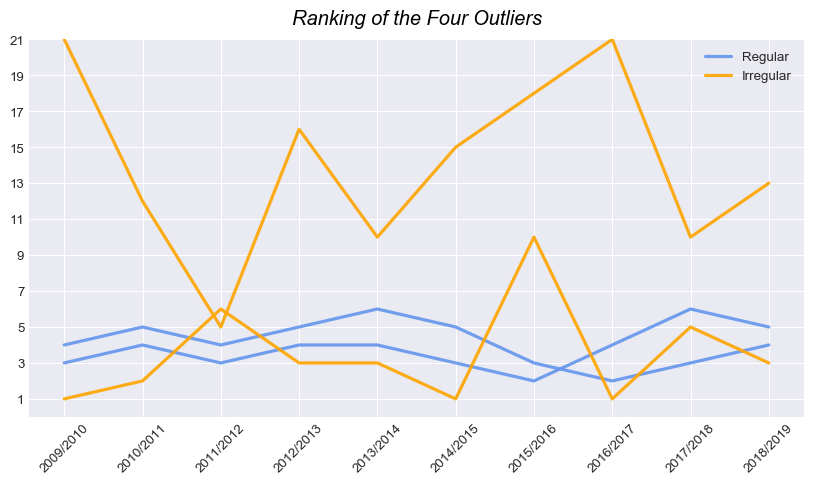

In [185]:
# plot the rank of outliers in one graph

# Initialize the figure
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 500/my_dpi), dpi=my_dpi) 
# create a color palette
palette = plt.get_cmap('Set1')
# Plot the club_div and past_co
plt.plot(seasons, arsenal, color='cornflowerblue', linewidth=2.4, alpha=0.9, label='Regular')
plt.plot(seasons, tottenham, color='cornflowerblue', linewidth=2.4, alpha=0.9, label='')
plt.plot(seasons, chelsea, color='orange', linewidth=2.4, alpha=0.9, label='Irregular')
plt.plot(seasons, newcastle, color='orange', linewidth=2.4, alpha=0.9, label='')
plt.legend()
plt.ylim(0,21)
y = range(1,22,2)
plt.yticks(y)
# Add title
plt.title('Ranking of the Four Outliers', fontsize=15, fontweight=0, color='black',style='italic', y=1.02 )

plt.xticks(rotation = 45) # rotate the xticks.